# <center> ICA and Cocktail problem </center>

We will implement three algorithm for Independent Components Analysis to extract source audio files mixed in the files mix[1-9].wav

Send your notebook and the one of the previous lab to reda.dehak at epita.fr before June 21st. Rename your notebook as SurnameNameTP[2-3].ipynb 

In [141]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn import preprocessing
from numpy.linalg import eigh
from numpy.linalg import inv
import IPython.display as Ipd
from scipy.stats import moment
np.random.seed(seed=0)
matplotlib.rcParams['figure.figsize'] = (17.0, 5.0)
matplotlib.rcParams['font.size'] = 15

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1- Load the mixed audio files?

In [51]:
datasrc = np.empty([9, 50000], np.float32)
for i in range(9):
    fs, datasrc[i,] = wavfile.read('./source' + str(i+1) + '.wav')

In [52]:
fs

8000

2- Display audio data?

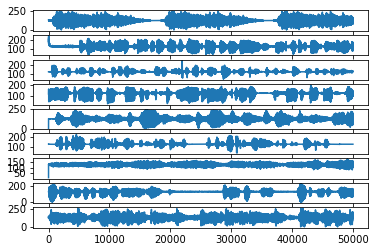

In [53]:
for i in range(9):
    plt.subplot(9, 1, i + 1)
    plt.plot(datasrc[i,])

In [199]:
nb_songs = datasrc.shape[0]
W = np.random.rand(nb_songs,nb_songs)
assert(np.linalg.det(W)!=0)
Mix = W@datasrc
print(Mix.shape)
Ipd.Audio(M[0,], rate=fs)

(9, 50000)


In [200]:
#M = np.apply_along_axis(lambda mix: mix - mix.mean(), 0, Mix)
def withening(Mix):
    mu_m = Mix.mean(axis=1)
    M = Mix - np.repeat(mu_m, Mix.shape[1]).reshape(Mix.shape)
    assert(M.shape==Mix.shape)
    assert(np.allclose(np.zeros(M.shape[0]),M.mean(axis=1)))

    cov = np.cov(M) #M@M.T
    #assert(np.allclose(cov, M@M.T))
    S, E = eigh(cov)

    #assert(np.allclose(M@M.T, E@np.diag(S)@E.T))

    C = inv(np.diag(S)**0.5)@E.T
    X = C@M #Blanchit
    assert(np.allclose(np.cov(X), np.eye(M.shape[0]))) #Sanity check
    return X,C,M


3- Implement the FOBI algorithm and use it to separate the 9 mixed wav files? 

In [212]:
from numpy.matlib import repmat
def FOBI(Mix):
    X,C,M = withening(Mix)
    norms = np.sum(X*X, axis=0)
    D = (X * repmat(norms.reshape((1,-1)), X.shape[0], 1)) @ X.T
    #D = X @ np.diag(norms) @ X.T
    L, U = eig(D)
    A = U.T@C
    H = A@M
    #check
#     norms = np.sum(H*H, axis=0)
#     D = (H * repmat(norms.reshape((1,-1)), H.shape[0], 1)) @ H.T
#     print(D)
#     assert(np.all(H == np.diag(np.diagonal(H))))
    return H,A

H,A = FOBI(Mix)

4- Compare the error between the original sources and obtained audio files? Listen to the obtained results?

5- Implement the JADE algorithm and use it to separate the 9 mixed wav files? 

In [45]:
from jade import *
....

SyntaxError: invalid syntax (<ipython-input-45-617da05273c8>, line 2)

6- Compare the error between the original sources and obtained audio files? Listen to the obtained results?

7- Implement the FASTICA algorithm and use it to separate the 9 mixed wav files? 

In [ ]:
from fastica import *
...

8- Compare the error between the original sources and obtained audio files? Listen to the obtained results?

9- Compare the three algorithms, results, complexity...? 